In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from linear_regression_class import Linear_regression


# Read the CSV and take only the data form price,area,bedrooms,bathrooms,stories and parking colums
data = pd.read_csv('Housing.csv', usecols=['price','area','bedrooms','bathrooms','stories', 'parking']).values
# Display the first 10 rows and all columns
print(data[0:10])

x_data = data[:, 1:] #take all the row and all the colums values from the 2nd colums
y_data = data[:, 0] #take all the row of the first colum

#reshape
x= x_data.T
y = y_data.reshape(1, -1)

print(f"x shape: {x.shape}")
print(f"y shape: {y.shape}")

[[13300000     7420        4        2        3        2]
 [12250000     8960        4        4        4        3]
 [12250000     9960        3        2        2        2]
 [12215000     7500        4        2        2        3]
 [11410000     7420        4        1        2        2]
 [10850000     7500        3        3        1        2]
 [10150000     8580        4        3        4        2]
 [10150000    16200        5        3        2        0]
 [ 9870000     8100        4        1        2        2]
 [ 9800000     5750        3        2        4        1]]
x shape: (5, 545)
y shape: (1, 545)


e:\Documents\American corner\AI workshop\Codes\Linear regression\linear_regression_class.py:16: RuntimeWarning: overflow encountered in square
  return (1/n) * np.sum(np.square(self.y - self.forward_propagation()))
e:\Documents\American corner\AI workshop\Codes\Linear regression\linear_regression_class.py:25: RuntimeWarning: invalid value encountered in subtract
  self.w  = self.w - learning_rate * dw


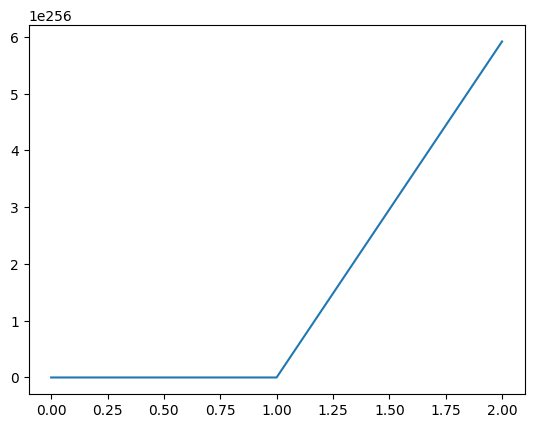

In [2]:
model = Linear_regression(x,y)

w,b,loss_history = model.train()

plt.plot(loss_history)

In [3]:
#Normalisation
max_x = x.max(axis=1,keepdims=True) #take the max of each column and create an array
x_normalized = x/max_x
y_nomrmalized = y/y.max()

area = x[0]
print(area[:5])

[7420 8960 9960 7500 7420]



Initial weights shape: (1, 5)
Initial bias shape: (1, 1)
(545,)
(545,)
(545,)


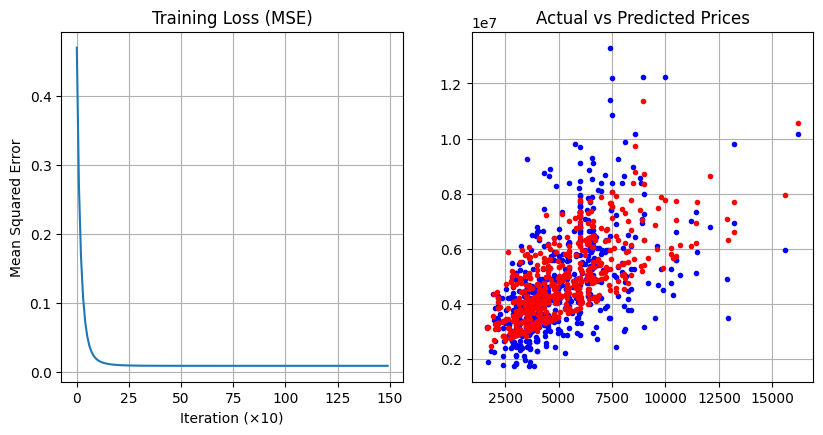

In [ ]:
model = Linear_regression(x_normalized,y_nomrmalized)

print(f"\nInitial weights shape: {model.w.shape}")
print(f"Initial bias shape: {model.b.shape}")

w,b,loss_history = model.train(learning_rate=0.3, iteration= 1500)
# Make predictions
predictions = model.predict(x_normalized)

# Denormalize predictions for visualization
predictions_denorm = predictions * y.max()

predictions_denorm= predictions_denorm.flatten()
y_denorm = y.flatten()


# Create visualization
plt.figure(figsize=(15, 10))

# Plot 1: Loss curve
plt.subplot(2, 3, 1)
plt.plot(loss_history)
plt.title('Training Loss (MSE)')
plt.xlabel('Iteration (×10)')
plt.ylabel('Mean Squared Error')
plt.grid(True)

# Plot 2: Actual vs Predicted
plt.subplot(2, 3, 2)

print(area.shape)
print(y_denorm.shape)
print(predictions_denorm.shape)
plt.plot(area, y_denorm,'b.', label='Predicted Price based on the area' )
plt.plot(area, predictions_denorm,'r.', label='Actual Price based on the area' )

plt.title('Actual vs Predicted Prices')
plt.grid(True)


Final weights: [[0.40331628 0.07572329 0.34095417 0.16479338 0.0851722 ]]
Final bias: [[-0.0109613]]


<function matplotlib.pyplot.show(close=None, block=None)>

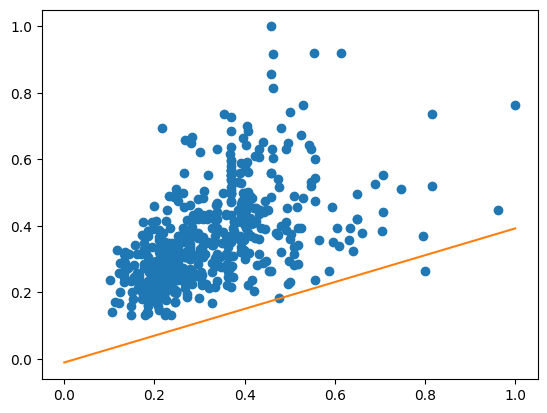

In [5]:
x_0 = np.linspace(0,1, 20)
y_0= w[0,0]*x_0 + b[0,0]

print(f"\nFinal weights: {w}")
print(f"Final bias: {b}")

plt.plot(x_normalized[0], y_nomrmalized[0],'o')
plt.plot(x_0,y_0)
plt.show


